In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dataframe = pd.read_csv("C:/Users/saini/OneDrive/Documents/SML/SML Assignment5/PRSA_data_2010.1.1-2014.12.31.csv")
dataframe = dataframe.dropna()
dataframe = dataframe.drop("cbwd", 1)
dataframe

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0


In [24]:
dataset = dataframe.to_numpy()[:, 1:]
# print( dataset)
year2011 = dataset[ dataset[:,0] == 2011 ]
year2012 = dataset[ dataset[:,0] == 2012 ]
year2013 = dataset[ dataset[:,0] == 2013 ]
year2014 = dataset[ dataset[:,0] == 2014 ]

#Classification Month
X_train = np.concatenate((year2013, year2014), axis=0)[:, 1:]
X_test = np.concatenate((year2011, year2012), axis=0)[:, 1:]

np.random.shuffle(X_train)
np.random.shuffle(X_test)

X = X_train[:, 1:]
Y = X_train[:, 0]
Xt = X_test[:, 1:]
Yt = X_test[:, 0]

# print(X_train, "train")
# print(X_test, "test")
print("years shape", year2011.shape, year2012.shape, year2013.shape, year2014.shape)
print("training and testing data shape", X.shape, Xt.shape)
print( "labels", Y.shape, Yt.shape )

years shape (8032, 11) (8295, 11) (8678, 11) (8661, 11)
training and testing data shape (17339, 9) (16327, 9)
labels (17339,) (16327,)


In [25]:
targets = ["day", "hour", "pm2.5", "DEWP", "TEMP", "PRES", "cbwd", "Iws", "ls", "lr"]
print(X)
print(len(targets))

[[ 26.    23.    39.   ...   1.79   0.     0.  ]
 [ 28.     9.    21.   ...  59.89   0.     0.  ]
 [  3.     4.    51.   ...   3.13   0.     0.  ]
 ...
 [  9.    17.   182.   ...   3.13   0.     0.  ]
 [ 25.    10.    24.   ...   4.02   0.     0.  ]
 [ 18.    20.    51.   ...  48.28   0.     0.  ]]
10


In [26]:
print(X[:, 5:])

[[1013.      1.79    0.      0.  ]
 [1029.     59.89    0.      0.  ]
 [1018.      3.13    0.      0.  ]
 ...
 [1009.      3.13    0.      0.  ]
 [1002.      4.02    0.      0.  ]
 [ 997.     48.28    0.      0.  ]]


AttributeError: 'numpy.float64' object has no attribute 'upper'

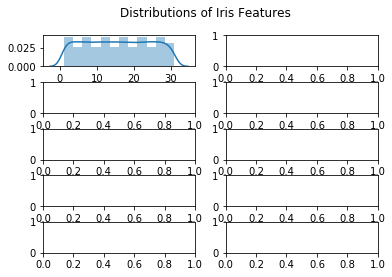

In [46]:
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Iris Features')


for ax, feature, name in zip(axes.flatten(), X.T, Y):
    sns.distplot(feature, ax=ax, bins=len(np.unique(Y) ))
#     ax.set(title=name[:-4].upper(), xlabel='cm')